In [4]:
# coding:utf-8

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import glob
import matplotlib.pyplot as plt
%matplotlib inline

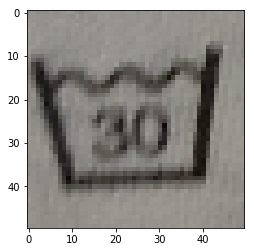

In [13]:
image = Image.open('./pre-all/train-seeds/30/IMG_20190915_015139.jpg')
image = image.convert("RGB")
image = image.resize((image_size, image_size))
data = np.asarray(image)
plt.imshow(data)

In [2]:
folder = ['95',
        '50',
        'hanging_dry',
        'not_bleachable',
        'wetcleaning_weak',
        '60',
        'wetcleaning_ok',
        'donot_drycleaning',
        'weetcleaning_very_weak',
        '30_very_weak',
        '40_very_weak',
        'ironing_upto200',
        'not_washable',
        'donot_wetcleaning',
        'drycleaning_F',
        'bleachable',
        'flat_dry_shade',
        'drycleaning_F_weak',
        'flat_dry_wet',
        'drycleaning_P_weak',
        'tumble_dry_upto60',
        'ironing_upto150',
        'donot_tumble_dry',
        '30',
        'hanging_dry_wet',
        'flat_dry_wetshade',
        '40_weak',
        'donot_ironing',
        'flat_dry',
        '60_weak',
        'hanging_dry_shade',
        'bleachable_oxygen',
        '30_weak',
        'drycleaning_P',
        'hand-wash',
        '70',
        'hanging_dry_wetshade',
        'tumble_dry_upto80',
        '40',
        '50_weak',
        'ironing_upto110']

image_size = 50

X = []
Y = []
for index, name in enumerate(folder):
    dir = "./pre4/train/" + name
    files = glob.glob(dir + "/*.png")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        plt.imshow(data)
        X.append(data)
        Y.append(index)

X = np.array(X)
Y = np.array(Y)

In [3]:
X = X.astype('float32')
X = X / 255.0
X.shape

(15712, 50, 50, 3)

In [4]:
# 正解ラベルの形式を変換
Y = np_utils.to_categorical(Y, len(folder))

In [5]:
# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [22]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(folder)))
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [23]:
#訓練
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Train on 12569 samples, validate on 3143 samples
Epoch 1/2
12569/12569 [==============================] - 300s - loss: 0.8783 - acc: 0.6133 - val_loss: 0.2032 - val_acc: 0.9478
Epoch 2/2
12569/12569 [==============================] - 300s - loss: 0.1760 - acc: 0.9418 - val_loss: 0.0351 - val_acc: 0.9924


In [24]:
#評価 & 評価結果出力
print(model.evaluate(X_test, y_test))


3143/3143 [==============================] - 23s    
[0.035112140448352085, 0.9923639834552975]


In [25]:
# モデルの保存
open('and_2.json',"w").write(model.to_json())

# 学習済みの重みを保存
model.save_weights('and_2_weight.hdf5')

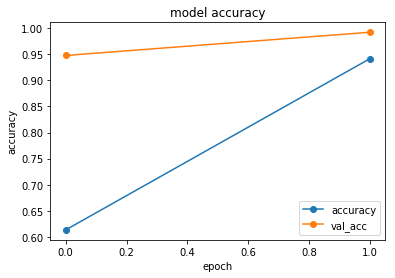

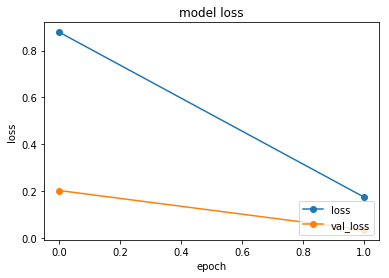

In [26]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

plot_history(history)